# 1 Nhập các thu viện cần thiết để xử lí


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Đọc dữ liệu từ file và đặt tên cột:

In [2]:
df = pd.read_csv("project.csv")
df.columns = ['State', 'Total cases', 'active','death','active ratio (%)','discharged ratio(%)','Death ratio(%)']

In [3]:
df.head(5)


,State,Total cases,active,death,active ratio (%),discharged ratio(%),Death ratio(%)
0,Andhra Pradesh,2039529,14388,2011063,0.71,98.60,0.69
1,Arunachal Pradesh,54126,410,53444,0.76,98.74,0.50
2,Assam,598423,4984,587632,0.83,98.20,0.97
3,Bihar,725901,69,716173,0.01,98.66,1.33
4,Chandigarh,65188,41,64329,0.06,98.68,1.25


# 3 Đưa ra số ca covid nhiều nhất trên 1 bang

In [4]:
highest_cases_state = df.groupby('State').sum()['Total cases']
highest_cases_state.max()

6524498

# 4 Sắp xếp lại các thành phố theo thứ tự tăng dần của các ca mắc


In [5]:
df.sort_values("Total cases", axis = 0, ascending = True,
                 inplace = True, na_position ='first')
  
df.head(5)

,State,Total cases,active,death,active ratio (%),discharged ratio(%),Death ratio(%)
17,Lakshadweep,10359,8,10300,0.08,99.43,0.49
6,Dadra and Nagar Haveli and Daman and Diu,10670,0,10666,0.00,99.96,0.04
16,Ladakh,20737,138,20392,0.67,98.34,1.00
23,Nagaland,30907,467,29786,1.51,96.37,2.12
28,Sikkim,30971,654,29937,2.11,96.66,1.23


# 5 Vẽ biểu đồ hiển thị số ca tử vong của các bang:

In [6]:
states = df['State'].unique()
deaths = df['death']

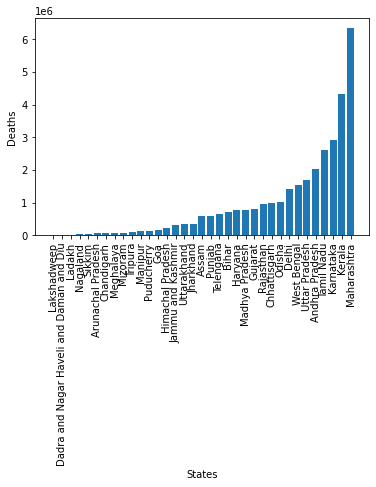

In [7]:
plt.bar(x=states , height=deaths)
plt.xticks(states,rotation=90)

plt.xlabel('States')
plt.ylabel('Deaths')
plt.show()



# 6 Thêm cột warning nơi nào có số ca tử vong trên 1000 thì là yes còn lại sẽ là no:


In [8]:
df['warning'] = ''
warning = []
df.head(5)

,State,Total cases,active,death,active ratio (%),discharged ratio(%),Death ratio(%),warning
17,Lakshadweep,10359,8,10300,0.08,99.43,0.49,
6,Dadra and Nagar Haveli and Daman and Diu,10670,0,10666,0.00,99.96,0.04,
16,Ladakh,20737,138,20392,0.67,98.34,1.00,
23,Nagaland,30907,467,29786,1.51,96.37,2.12,
28,Sikkim,30971,654,29937,2.11,96.66,1.23,


In [9]:
def is_warning(df):
    for item in range(len(df)):
        if (df.loc[item, 'death'] >= 50000):
            warning.append('danger')
        else:
            warning.append('')
    return warning

In [10]:
df['warning'] = is_warning(df)
df

,State,Total cases,active,death,active ratio (%),discharged ratio(%),Death ratio(%),warning
17,Lakshadweep,10359,8,10300,0.08,99.43,0.49,danger
6,Dadra and Nagar Haveli and Daman and Diu,10670,0,10666,0.00,99.96,0.04,danger
16,Ladakh,20737,138,20392,0.67,98.34,1.00,danger
23,Nagaland,30907,467,29786,1.51,96.37,2.12,danger
28,Sikkim,30971,654,29937,2.11,96.66,1.23,danger
1,Arunachal Pradesh,54126,410,53444,0.76,98.74,0.50,danger
4,Chandigarh,65188,41,64329,0.06,98.68,1.25,
21,Meghalaya,79667,1896,76391,2.38,95.89,1.73,danger
22,Mizoram,81460,15140,66057,18.59,81.09,0.32,danger
31,Tripura,83905,346,82750,0.41,98.62,0.96,danger


# 7 Tạo 1 cột giữa cột active và cột death đặt tên là discharged sau đó tính số người đã ra viện = tổng số ca - số ca hiện đang mắc- số ca đã tử vong

In [11]:
discharged=[]
idx = 2
discharged_value= df['Total cases'] - df['death'] + df['active'] 
df.insert(loc=2,column='discharged',value = discharged_value)


In [12]:
df.head(5)

,State,Total cases,discharged,active,death,active ratio (%),discharged ratio(%),Death ratio(%),warning
17,Lakshadweep,10359,67,8,10300,0.08,99.43,0.49,danger
6,Dadra and Nagar Haveli and Daman and Diu,10670,4,0,10666,0.00,99.96,0.04,danger
16,Ladakh,20737,483,138,20392,0.67,98.34,1.00,danger
23,Nagaland,30907,1588,467,29786,1.51,96.37,2.12,danger
28,Sikkim,30971,1688,654,29937,2.11,96.66,1.23,danger


# 8. Vẽ một biểu đồ chồng lên phía trên biểu đồ đã vẽ thể hiện số ca tử vong so với số ca đã được ra viện:

C:\Users\USER\AppData\Local\Temp/ipykernel_12864/3144430414.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(states, rotation=90, size=7)


AttributeError: 'AxesSubplot' object has no attribute 'xlable'

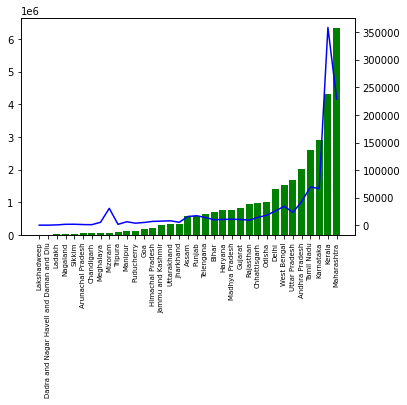

In [15]:
x = states
y1 = deaths
y2 = df['discharged']

fig,ax1 =plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x,y1,color='g')
ax2.plot(x,y2,'b-')


ax1.set_xticklabels(states, rotation=90, size=7)
ax1.xlable('X data')
ax1.ylabel('Y1 data', color='g')
ax2.ylabel('Y2 data', color='b')

plt.show()

# 9 Cho số ca mắc trên toàn thế giới là 219 triệu ca hãy thêm cột global ratio để tính phần trăm số ca mắc covid của ấn độ so với thế giới

In [16]:
df['global ratio(%)'] = ''
global_ratio = []
df.head(5)

,State,Total cases,discharged,active,death,active ratio (%),discharged ratio(%),Death ratio(%),warning,global ratio(%)
17,Lakshadweep,10359,67,8,10300,0.08,99.43,0.49,danger,
6,Dadra and Nagar Haveli and Daman and Diu,10670,4,0,10666,0.00,99.96,0.04,danger,
16,Ladakh,20737,483,138,20392,0.67,98.34,1.00,danger,
23,Nagaland,30907,1588,467,29786,1.51,96.37,2.12,danger,
28,Sikkim,30971,1688,654,29937,2.11,96.66,1.23,danger,


In [17]:
a = df['Total cases']
india_cases = sum(a)
    

In [18]:
global_ratio_value = india_cases / 219000000 * 100
df['global ratio(%)'] = global_ratio_value
df.head(5)

,State,Total cases,discharged,active,death,active ratio (%),discharged ratio(%),Death ratio(%),warning,global ratio(%)
17,Lakshadweep,10359,67,8,10300,0.08,99.43,0.49,danger,15.295404
6,Dadra and Nagar Haveli and Daman and Diu,10670,4,0,10666,0.00,99.96,0.04,danger,15.295404
16,Ladakh,20737,483,138,20392,0.67,98.34,1.00,danger,15.295404
23,Nagaland,30907,1588,467,29786,1.51,96.37,2.12,danger,15.295404
28,Sikkim,30971,1688,654,29937,2.11,96.66,1.23,danger,15.295404


# 10 Vẽ biểu đồ so sánh giữa ca tử vong và ca mắc của một bang:

In [28]:
cases = df['Total cases']
def draw_boxplot(df,states):
    for item in range(len(df)):
        if df.loc[item, 'State'] == states:
            plt.xticks(cases,rotation=90)
            x=df['Total cases']
            y=df['death']
    sns.boxplot(x, y)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


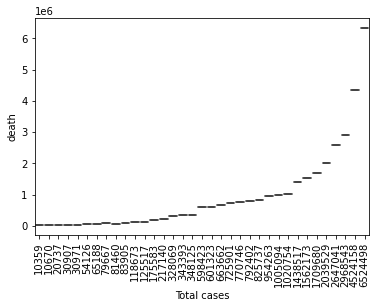

In [29]:
draw_boxplot(df, 'Lakshadweep')